In [2]:
import os
os.chdir("D:\\Data science\\Deep_Learning_A_Z\\Deep_Learning_A_Z\\Volume 1 - Supervised Deep Learning\\Part 3 - Recurrent Neural Networks (RNN)\\Section 12 - Building a RNN\\Recurrent_Neural_Networks")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
training_data = pd.read_csv("Google_Stock_Price_Train.csv")

In [5]:
training_set = training_data.iloc[:, 1:2].values

In [6]:
#future scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(training_set)

In [8]:
#create data with 60 time steps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [10]:
#reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
#Building RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



C:\Users\Q6IH\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
#initialiing RNN
regressor = Sequential()

In [14]:
#add first LSTM Layer with dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [15]:
#add second LSTM  Layer with dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [16]:
#add third LSTM layer with dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
#add fourth LSTM
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

In [18]:
#add output layer
regressor.add(Dense(units=1))

In [19]:
#compiling RNN
regressor.compile(optimizer = 'adam', loss = "mean_squared_error")

In [20]:
#fitting RNN
regressor.fit(X_train, y_train, epochs = 100, batch_size =32)

Epoch 1/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0572
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0065
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0058
Epoch 5/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0056
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [==============================] - 7s 6ms/step -

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0014


In [21]:
#getting real stock price
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [32]:
#getting predicted stock price
dataset_total = pd.concat((training_data["Open"], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [33]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [35]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

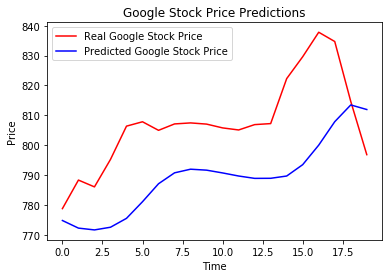

In [36]:
#visualization
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color ='blue', label = "Predicted Google Stock Price")
plt.title("Google Stock Price Predictions")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()